In [2]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),

    layers.Dense(128, activation='relu'),
    
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

c:\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
print("\nStarting ANN model training...")
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)
print("Model training finished!")


Starting ANN model training...
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8507 - loss: 0.5077 - val_accuracy: 0.9667 - val_loss: 0.1252
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9533 - loss: 0.1581 - val_accuracy: 0.9730 - val_loss: 0.0916
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9662 - loss: 0.1111 - val_accuracy: 0.9758 - val_loss: 0.0807
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9729 - loss: 0.0883 - val_accuracy: 0.9792 - val_loss: 0.0708
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9767 - loss: 0.0738 - val_accuracy: 0.9798 - val_loss: 0.0726
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9788 - loss: 0.0654 - val_accuracy: 0.9810 - val_loss: 0.0699
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9807 - loss: 0.0605 - val_accuracy: 0.9782 - val_loss: 0.0769
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - a

In [6]:
print("\nEvaluating model on test data...")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


Evaluating model on test data...
313/313 - 1s - 2ms/step - accuracy: 0.9781 - loss: 0.0707

Test accuracy: 0.9781



Generating learning curve plots...


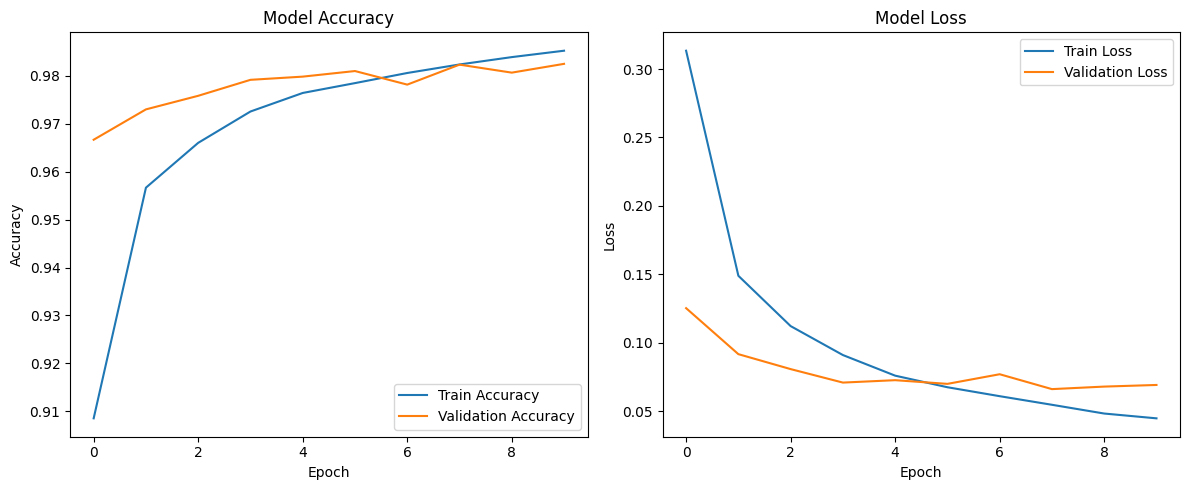

In [7]:
import matplotlib.pyplot as plt

print("\nGenerating learning curve plots...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [8]:
model_filename = 'digit_recognizer_model.keras'
model.save(model_filename)
print(f"\nModel saved successfully as {model_filename}")



Model saved successfully as digit_recognizer_model.keras
